In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix


%matplotlib inline

In [2]:
movies_data = pd.read_csv("movies.dat",sep="::",header=None,names=["MovieID","Title","Genres"])
users_data = pd.read_csv("users.dat",sep="::",header=None,names=["UserID","Gender","Age","Occupation","Zip-code"])
ratings_data = pd.read_csv("ratings.dat",sep="::",header=None,names=["UserID","MovieID","Rating","Timestamp"])

C:\Users\raada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\raada\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\raada\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from th

In [3]:
data = pd.merge(users_data,ratings_data,on=["UserID"])

In [4]:
data.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [5]:
master_data = pd.merge(movies_data,data,on=["MovieID"],how="inner")

In [6]:
master_data.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,55117,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,11413,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,61614,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,95370,5,978226474


In [7]:
master_data.drop(["Genres","Zip-code","Timestamp"],axis=1,inplace=True)

In [8]:
master_data.head()

,MovieID,Title,UserID,Gender,Age,Occupation,Rating
0,1,Toy Story (1995),1,F,1,10,5
1,1,Toy Story (1995),6,F,50,9,4
2,1,Toy Story (1995),8,M,25,12,4
3,1,Toy Story (1995),9,M,25,17,5
4,1,Toy Story (1995),10,F,35,1,5


In [9]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
UserID        1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Rating        1000209 non-null int64
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


In [10]:
master_data.to_csv("master_data.csv",index=False)

## Import New DataSet

In [11]:
movie_lens = pd.read_csv("master_data.csv")

#### Check first 5 rows of dataset

In [12]:
movie_lens.head()

,MovieID,Title,UserID,Gender,Age,Occupation,Rating
0,1,Toy Story (1995),1,F,1,10,5
1,1,Toy Story (1995),6,F,50,9,4
2,1,Toy Story (1995),8,M,25,12,4
3,1,Toy Story (1995),9,M,25,17,5
4,1,Toy Story (1995),10,F,35,1,5


#### Check more info about dataset

In [13]:
movie_lens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
UserID        1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Rating        1000209 non-null int64
dtypes: int64(5), object(2)
memory usage: 53.4+ MB


#### Check mean, median, mode about dataset columns

In [14]:
movie_lens.describe()

,MovieID,UserID,Age,Occupation,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,2.973831e+01,8.036138e+00,3.581564e+00
std,1.096041e+03,1.728413e+03,1.175198e+01,6.531336e+00,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.030000e+03,1.506000e+03,2.500000e+01,2.000000e+00,3.000000e+00
50%,1.835000e+03,3.070000e+03,2.500000e+01,7.000000e+00,4.000000e+00
75%,2.770000e+03,4.476000e+03,3.500000e+01,1.400000e+01,4.000000e+00
max,3.952000e+03,6.040000e+03,5.600000e+01,2.000000e+01,5.000000e+00


#### Check data have null values or not

In [15]:
movie_lens.isna().any()

MovieID       False
Title         False
UserID        False
Gender        False
Age           False
Occupation    False
Rating        False
dtype: bool

In [16]:
movie_lens.loc[:,movie_lens.isna().any()]

""
0
1
2
3
4
...
1000204
1000205
1000206
1000207


In [17]:
movie_lens.isnull().sum()

MovieID       0
Title         0
UserID        0
Gender        0
Age           0
Occupation    0
Rating        0
dtype: int64

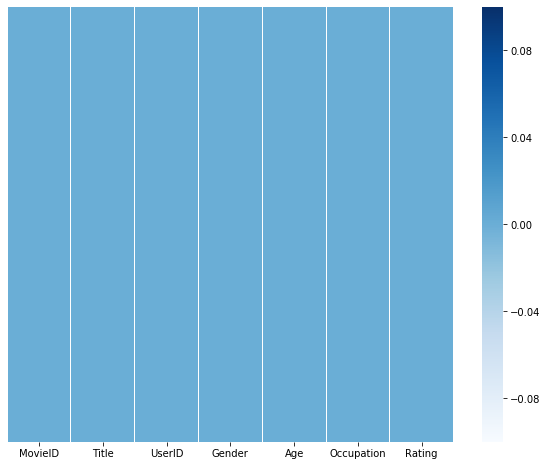

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(movie_lens.isnull(),yticklabels=False,cbar="False",cmap="Blues")

### User Age Distibution

In [19]:
age_group = movie_lens.groupby("Age").size()

In [20]:
age_group

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
dtype: int64

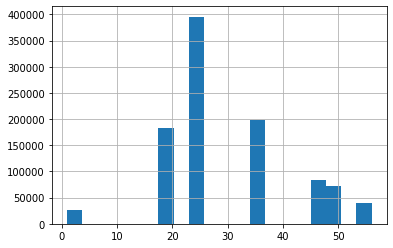

In [21]:
movie_lens["Age"].hist(bins=20)

In [22]:
movie_lens.head()

,MovieID,Title,UserID,Gender,Age,Occupation,Rating
0,1,Toy Story (1995),1,F,1,10,5
1,1,Toy Story (1995),6,F,50,9,4
2,1,Toy Story (1995),8,M,25,12,4
3,1,Toy Story (1995),9,M,25,17,5
4,1,Toy Story (1995),10,F,35,1,5


## User rating of the movie "Toy Story"

In [23]:
toy_story = movie_lens[movie_lens["MovieID"]==1]

In [24]:
toy_story

,MovieID,Title,UserID,Gender,Age,Occupation,Rating
0,1,Toy Story (1995),1,F,1,10,5
1,1,Toy Story (1995),6,F,50,9,4
2,1,Toy Story (1995),8,M,25,12,4
3,1,Toy Story (1995),9,M,25,17,5
4,1,Toy Story (1995),10,F,35,1,5
...,...,...,...,...,...,...,...
2072,1,Toy Story (1995),6022,M,25,17,5
2073,1,Toy Story (1995),6025,F,25,1,5
2074,1,Toy Story (1995),6032,M,45,7,4
2075,1,Toy Story (1995),6035,F,25,1,4


In [25]:
toy_story_total_rating = toy_story.groupby("Rating").size()

In [26]:
toy_story_total_rating

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [27]:
toy_story_total_rating.agg({"Rating":"mean"})

Rating    415.4
dtype: float64

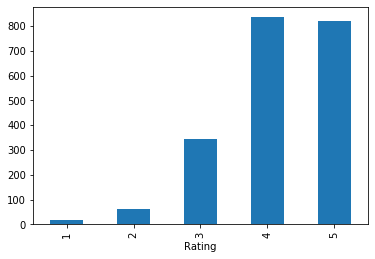

In [28]:
toy_story_total_rating.plot(kind="bar")

## This Graph Shows Movie "ToyStory" Has Got Maximum 4 Stars And After That 5 Stars Rating....

## Top 25 movies by viewership rating

In [29]:
viewership_rating = movie_lens.groupby(["MovieID"], as_index=False)

In [30]:
average_movie_ratings = viewership_rating.agg({"Rating":"mean"})

In [31]:
top_25_movies = average_movie_ratings.sort_values("Rating",ascending=False).head(25)

In [32]:
top_25_movies

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


In [33]:
top_25_movie = pd.merge(top_25_movies, movies_data, how='left', left_on=['MovieID'], right_on=['MovieID'])

In [34]:
top_25_movie

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


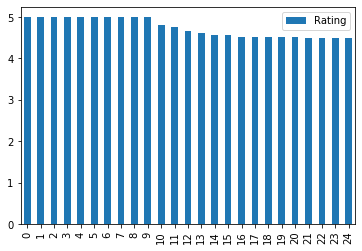

In [35]:
plt.figure()
top_25_movie["Rating"].plot(kind="bar",stacked=True,legend=True)

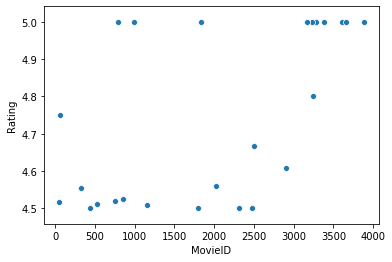

In [36]:
sns.scatterplot(x="MovieID",y="Rating",data=top_25_movie)

## Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [37]:
#movie_lens.head(3)

In [38]:
user_id_2696 = movie_lens[movie_lens["UserID"]==1]

In [39]:
## total rating given by user id = 2696
len(user_id_2696)

53

In [40]:
user_id_2696.head(10)

,MovieID,Title,UserID,Gender,Age,Occupation,Rating
0,1,Toy Story (1995),1,F,1,10,5
22893,48,Pocahontas (1995),1,F,1,10,5
41541,150,Apollo 13 (1995),1,F,1,10,5
67447,260,Star Wars: Episode IV - A New Hope (1977),1,F,1,10,4
141660,527,Schindler's List (1993),1,F,1,10,5
144754,531,"Secret Garden, The (1993)",1,F,1,10,4
158459,588,Aladdin (1992),1,F,1,10,4
167921,594,Snow White and the Seven Dwarfs (1937),1,F,1,10,4
168684,595,Beauty and the Beast (1991),1,F,1,10,5
172011,608,Fargo (1996),1,F,1,10,4


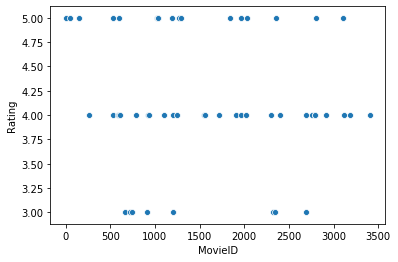

In [41]:
sns.scatterplot(x="MovieID",y="Rating",data=user_id_2696)
plt.show()

## Feature Engineering

In [42]:
val = movies_data.Genres.str.split("|")

In [43]:
fin_col = []
for v in fin_col:
    for i in v:
        if i not in fin_col:
            fin_col.append(i)
            
fin_col.append("Gender")
fin_col.append("Age")
fin_col.append("Rating")

df = pd.DataFrame(columns=fin_col)

In [44]:
result = movie_lens.merge(movies_data,on=["MovieID"],how="left")[["Genres","Rating","Gender","Age"]]

In [45]:

val = movies_data.Genres.str.split("|")

res_col = []
for v in val:
    for i in v:
        if i not in res_col:
            res_col.append(i)

res_col.append("Gender")
res_col.append("Age")
res_col.append("Rating")

df = pd.DataFrame(columns=res_col)

res = movie_lens.merge(movies_data, on = ['MovieID'], how="left")[["Genres","Rating","Gender", "Age"]]

for index, row in res.head(20000).iterrows():
    tmp = row.Genres.split("|") 
    
    for i in tmp:
       # print(i)
        df.loc[index,i] = 1
        df.loc[index,"Gender"] = res.loc[index,"Gender"]
        df.loc[index,"Age"] = res.loc[index,"Age"]
        df.loc[index,"Rating"] = res.loc[index,"Rating"]
         
#         var = res.loc[index, "Rating"]
#         if var == 1:
#             df.loc[index,"Rating"] = "one" 
#         elif var == 2:
#             df.loc[index,"Rating"] = "two"
#         elif var == 3:
#             df.loc[index,"Rating"] = "three"
#         elif var == 4:
#             df.loc[index,"Rating"] = "four"
#         else:
#             df.loc[index,"Rating"] = "five"
     
    df.loc[index,df.columns[~df.columns.isin(tmp+["Gender","Rating","Age"])]] = 0

df.head()
    

#df.loc[i,"Animation"] = 1

#df

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Gender,Age,Rating
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,F,1,5
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,F,50,4
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,M,25,4
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,M,25,5
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,F,35,5


In [51]:
df.columns

Index(['Animation', 'Children's', 'Comedy', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi',
       'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western',
       'Gender', 'Age', 'Rating'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
X = df[df.columns[~df.columns.isin(["Rating"])]]
y = df.Rating

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [60]:
number = LabelEncoder()
X_train.Gender = number.fit_transform(X_train["Gender"].astype("str"))

In [64]:
X_test.Gender = number.fit_transform(X_test["Gender"].astype("str"))

In [69]:
y_train = number.fit_transform(y_train.astype("int"))
y_test = number.fit_transform(y_test.astype("int"))

In [71]:
y_train.dtype

dtype('int64')

In [74]:
lin_model = LogisticRegression(max_iter=400).fit(X_train,y_train)

C:\Users\raada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\raada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [75]:
y_pred = lin_model.predict(X_test)

In [77]:
print(accuracy_score(y_test,y_pred))

0.3994
